In [1]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline 

import operator
import scipy.stats as stats

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
pd.options.display.max_columns = 500
pd.set_option('max_info_columns', 500)

In [2]:
# import train and test data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

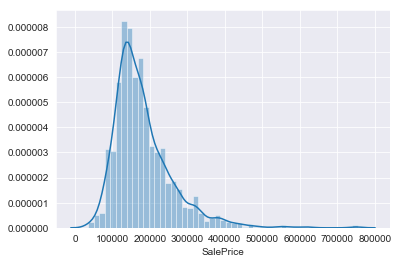

In [5]:
# plot the distribution of our dep var 
sns.distplot(train['SalePrice']);

SalePrice is positivelly skewed
    
**Note**:
- consider transforming the variable using log-transformation
- consider removing outliers

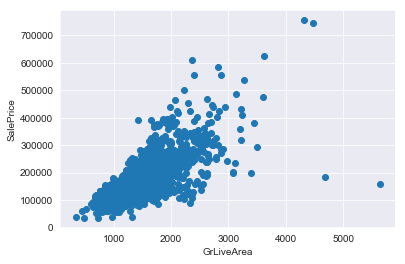

In [6]:
# check SalePrice relationship with GrLivArea
plt.scatter(train['GrLivArea'], train['SalePrice'])
plt.xlabel('GrLiveArea')
plt.ylabel('SalePrice')
plt.show();

There is positive relationship between GrLivArea and SalePrice. However there are some outliers. Lets remove the two outliers that seem to have a very large area and low price.

In [7]:
train = train[~((train['GrLivArea']>4000) & (train['SalePrice']<300000))].copy()

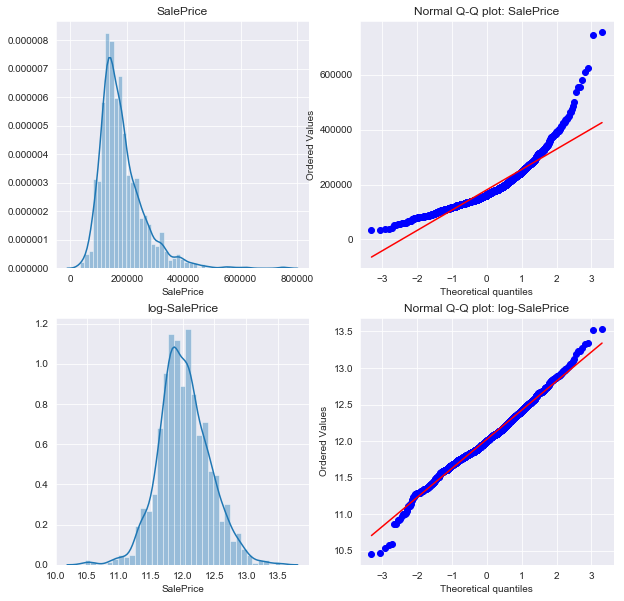

In [8]:
# plot the distribution of our dep var 
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(2,2,1)
sns.distplot(train['SalePrice'])
plt.title('SalePrice')

ax2 = fig.add_subplot(2,2,2)
stats.probplot(train['SalePrice'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot: SalePrice")

ax3 = fig.add_subplot(2,2,3)
sns.distplot(np.log1p(train['SalePrice']))
plt.title('log-SalePrice')

ax4 = fig.add_subplot(2,2,4)
stats.probplot(np.log1p(train['SalePrice']), dist="norm", plot=plt)
plt.title("Normal Q-Q plot: log-SalePrice");

Based on the distribution plot above, SalePrice is right-skewed. QQ-plot shows that the data is not linear. Lets log-transform our dep variable.

In [9]:
train['SalePrice'] = np.log1p(train['SalePrice'])

## Missing Data

In [10]:
df = pd.concat([train, test])
df = df[train.columns]
nulls = round(df.isnull().sum()/df.shape[0]*100, 2)
nulls[nulls>0].sort_values(ascending=False)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


PoolQC          99.69
MiscFeature     96.40
Alley           93.21
Fence           80.43
SalePrice       50.02
FireplaceQu     48.68
LotFrontage     16.66
GarageYrBlt      5.45
GarageFinish     5.45
GarageQual       5.45
GarageCond       5.45
GarageType       5.38
BsmtCond         2.81
BsmtExposure     2.81
BsmtQual         2.78
BsmtFinType2     2.74
BsmtFinType1     2.71
MasVnrType       0.82
MasVnrArea       0.79
MSZoning         0.14
BsmtFullBath     0.07
BsmtHalfBath     0.07
Functional       0.07
Utilities        0.07
BsmtFinSF2       0.03
BsmtUnfSF        0.03
BsmtFinSF1       0.03
TotalBsmtSF      0.03
SaleType         0.03
KitchenQual      0.03
Exterior2nd      0.03
Exterior1st      0.03
GarageCars       0.03
GarageArea       0.03
Electrical       0.03
dtype: float64

'Alley', 'Pool_QC', 'Fence', and 'Misc_Feature' are mostly nulls.
    
Drop 'Lot Frontage' as it's 17% NULLs and there is Lot Area variable that is typically a stonger predictor
drop_features.append('Lot Frontage')
    
Let's drop all the features with > 15% NULLs

In [11]:
# create a list of features to drop to keep track of what columns should be removed from train and test
# also drop Id since it will not be used in the model
drop_features = ['Id', 'PoolQC', 'MiscFeature',  'Alley', 'Fence', 'FireplaceQu', 'LotFrontage']

In [12]:
# create a funciton to plot missing values
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
# plot_null_matrix(df)

In [13]:
# df['GarageYrBlt'].describe()

In [14]:
# df[df['GarageYrBlt']>2010]['GarageYrBlt']

In [15]:
# create a function to fix garage columns
def clean_garage(df):
    df['GarageType'] = df['GarageType'].fillna('None')
    df[['GarageYrBlt','GarageCars', 'GarageArea']] = df[['GarageYrBlt','GarageCars', 'GarageArea']].fillna(0)
    df['GarageFinish'] = df['GarageFinish'].map({'Fin':3,'RFn':2,'Unf':1}).fillna(0)
    df['GarageQual'] = df['GarageQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
    df['GarageCond'] = df['GarageCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
    df.loc[df['GarageYrBlt']==2207,'GarageYrBlt'] = 2007
    df['GarageYrBeforeSale'] = df['YrSold'] - df['GarageYrBlt']
    df.drop('GarageYrBlt', axis=1, inplace=True)
    
    return df

In [16]:
# create a function to clean basement columns
def clean_bsmt(df):
    df['BsmtQual'] = df['BsmtQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
    df['BsmtCond'] = df['BsmtCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(0)
    df['BsmtExposure'] = df['BsmtExposure'].map({'Gd':4, 'Av':3, 'Mn':2, 'No':1}).fillna(0)
    df['BsmtFinType1'] = df['BsmtFinType1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}).fillna(0)
    df['BsmtFinType2'] = df['BsmtFinType2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1}).fillna(0)
    df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']] = (
        df[['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath']].fillna(0))
    return df

In [17]:
# create a function to clean Masonry veneer columns
def clean_masvnr(df):
    df['MasVnrType'] = df['MasVnrType'].fillna('None')
    df['MasVnrArea'] = df['MasVnrArea'].fillna(0)
    return df

In [18]:
def clean_other(df):
    # fill nulls in Utilities with the most popular val which is AllPub
    df['MSZoning'] = df['MSZoning'].fillna('RL')
    df['Utilities'] = df['Utilities'].map({'AllPub':4, 'NoSewr':3, 'NoSeWa':2, 'ELO':1}).fillna(4)
    # fill nulls in Utilities with the most popular val which is Typ
    df['Functional'] = df['Functional'].map({
        'Typ':7,'Min1':6,'Min2':5,'Mod':4,'Maj1':3,'Maj2':2,'Sev':1,'Sal':0}).fillna(7)
    df['Exterior1st'] = df['Exterior1st'].fillna('VinylSd')
    df['Exterior2nd'] = df['Exterior2nd'].fillna('VinylSd')
    df['Electrical'] = df['Electrical'].fillna('SBrkr')
    df['KitchenQual'] = df['KitchenQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1}).fillna(3)
    df['SaleType'] = df['SaleType'].fillna('WD')
    return df

In [19]:
def create_year(df):
    # create a feature for num of years between built and sale
    df['YearsBeforeSale'] = df['YrSold'] - df['YearBuilt']
    df['YearsSinceRemod'] = df['YrSold'] - df['YearRemodAdd']
    # change the records where years before sale is negative
    df['YearsBeforeSale'] = np.where(df['YearsBeforeSale']<0, 0, df['YearsBeforeSale'])
    df['YearsSinceRemod'] = np.where(df['YearsSinceRemod']<0, 0, df['YearsSinceRemod'])
    df.drop(['YrSold', 'YearBuilt', 'YearRemodAdd'], axis=1, inplace=True)
    return df

In [20]:
def convert_ordinal(df):
    # convert Street into binary
    df['Street'] = np.where(df['Street']=='Paved',1,0)
    # convert lot shape into binary: regular=1, irregular=0
    df['LotShape'] = df['LotShape'].map({'Reg':1,'IR1':0,'IR2':0,'IR3':0})
    df['LandSlope'] = df['LandSlope'].map({'Gtl':1,'Mod':2,'Sev':3})
    df['ExterQual'] = df['ExterQual'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    df['ExterCond'] = df['ExterCond'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    df['HeatingQC'] = df['HeatingQC'].map({'Ex':5, 'Gd':4, 'TA':3, 'Fa':2, 'Po':1})
    df['CentralAir'] = np.where(df['CentralAir']=='Y',1,0)
    df['PavedDrive'] = df['PavedDrive'].map({'Y':1,'N':0,'P':0.5})
    df['MoSold'] = df['MoSold'].astype(str)
    return df

In [21]:
def clean_data(df, cols_to_drop=None):
    df = clean_garage(df)
    df = clean_bsmt(df)
    df = clean_masvnr(df)
    df = clean_other(df)
    df = create_year(df)
    if cols_to_drop:
        df.drop(cols_to_drop, axis=1, inplace=True)
    convert_ordinal(df)
    return df

# run on df
train = clean_data(train, cols_to_drop=drop_features)
test = clean_data(test, cols_to_drop=drop_features)

## EDA on Existing Features

Create groups of columns by data type

In [22]:
# create a list with numerical columns and a list with categorical ones
non_cat_cols = list(train.select_dtypes(exclude='object').columns)
non_cat_cols.remove('SalePrice')
cat_cols = list(train.select_dtypes(include='object').columns)

In [23]:
# create a list with continuous features
num_cols = ['LotArea','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
             'LowQualFinSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
             'ScreenPorch','PoolArea','MiscVal','GarageYrBeforeSale','YearsBeforeSale','YearsSinceRemod',
             'BsmtFullBath','BedroomAbvGr','TotRmsAbvGrd','GarageCars','BsmtHalfBath','HalfBath','FullBath',
             'KitchenAbvGr','Fireplaces']
# ordinal columns
rank_cols = list(set(non_cat_cols) - set(num_cols))

**Create correlation plot with SalePrice and all numeric variables**

In [24]:
# check correlations between the predictor variable and numberical variables
def plot_corr(df_col, width=20, height=14):
    # create a correlation matrix
    df_corr = df_col.corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    df_corr = df_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(df_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(width,height))
    ax = sns.heatmap(df_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

In [25]:
# create finctions to plot columns

def plot_cols(df, chart_type='bar'):
    columns = list(df.columns)
    grid_cols_count = len(columns)
    grid_rows_count = math.ceil(grid_cols_count/4)
    grid_len = grid_rows_count * 6
    
    fig = plt.figure(figsize=(25,grid_len))
    
    for col, idx in zip(columns, range(1,grid_cols_count)):
        ax = fig.add_subplot(grid_rows_count,4,idx)
        if chart_type=='density':
            sns.distplot(df[col], hist=True, kde=True, hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 1})
        else:
            freq_table = df[col].dropna().value_counts().sort_index()
            ax.bar(freq_table.index, freq_table.values)
        ax.set_title(col)
    plt.show()

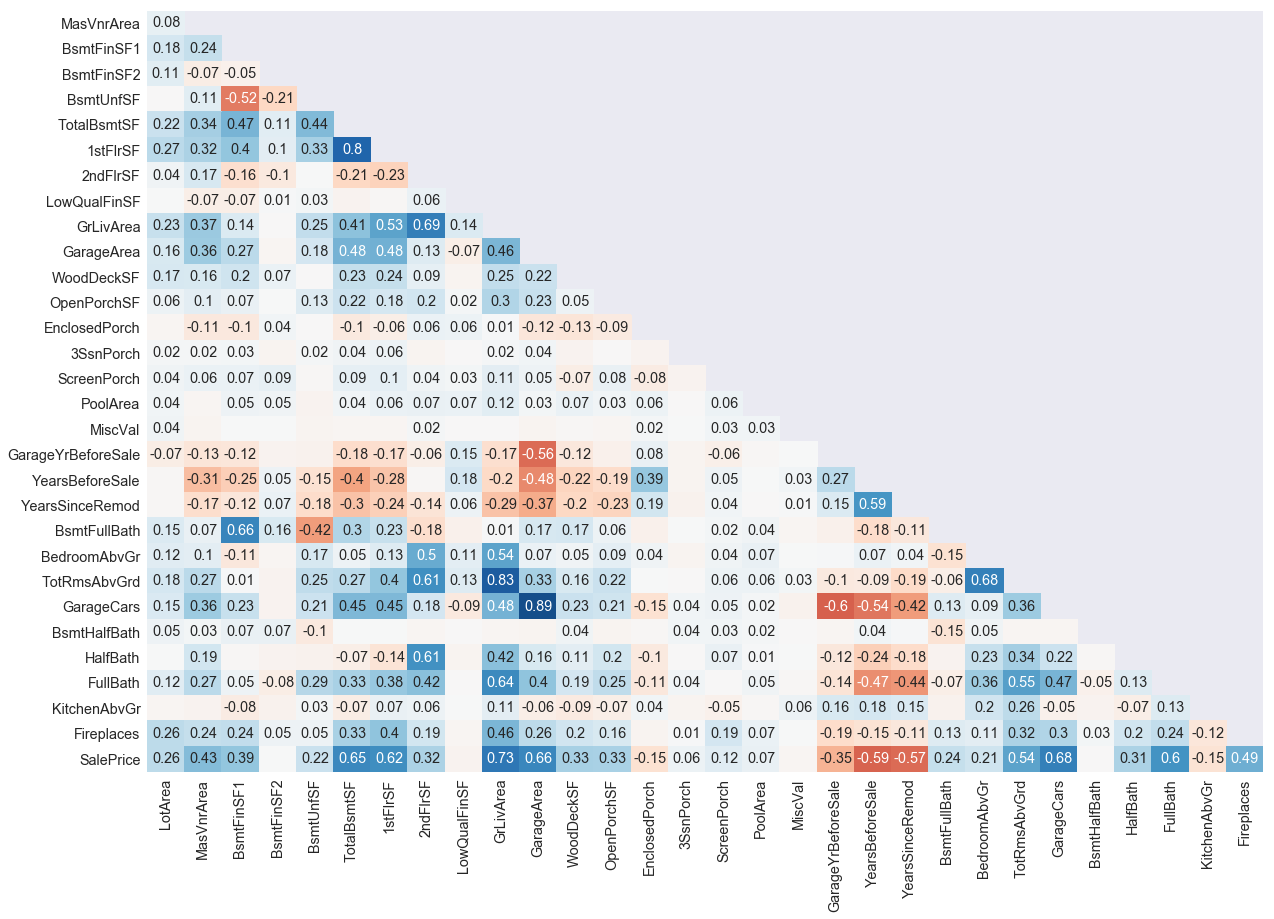

In [26]:
cols = num_cols + ['SalePrice']
plot_corr(train[cols])

**Get a list of variables that have absolute corr of at least 0.4 with SalePrice**

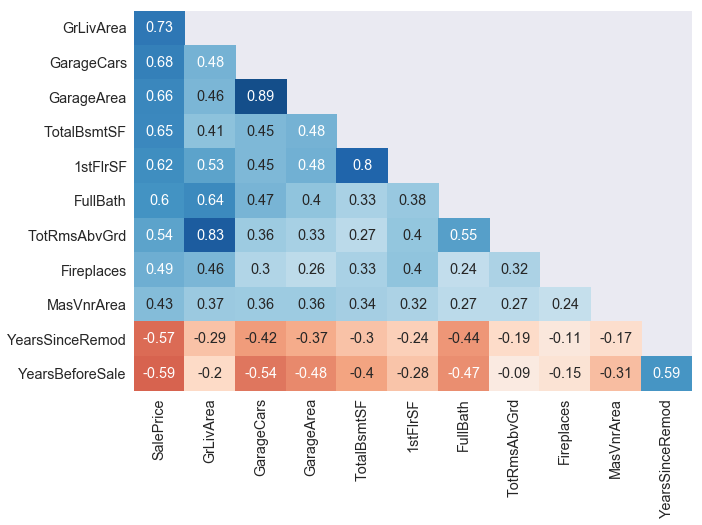

In [27]:
corr_df = train[cols].corr()
top_corr_vars = corr_df[abs(corr_df['SalePrice'])>0.4]['SalePrice'].sort_values(ascending=False).index
plot_corr(train[top_corr_vars], width=10, height=7)

Sale Price has high correlation with features that descrive square footage and size of the house (GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF)
    
It has a moderate negative correlation with the YearsBeforeSale and YearsSinceRemod
    
Area size features are also highly correlated with each other:
- GrLivArea is highly correlated with TotRmsAbvGrd. It would make sense to include only one of the features into the model
- GarageCars and GarageArea are highly correlated
- TotalBsmntSF and 1stFlrSF

In [28]:
top_corr_vars

Index(['SalePrice', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'MasVnrArea',
       'YearsSinceRemod', 'YearsBeforeSale'],
      dtype='object')

In [29]:
def plot_dist_scatter(var_name, transformation=False):
    if transformation:
        var = transform_var(var_name)
    else:
        var = train[var_name]
    fig = plt.figure(figsize=(15,3))
    ax1 = fig.add_subplot(1,3,1)
    sns.distplot(var)
    plt.title(var_name)

    ax2 = fig.add_subplot(1,3,2)
    stats.probplot(var, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot: {}".format(var_name))
    
    ax3 = fig.add_subplot(1,3,3)
    plt.scatter(var, train['SalePrice'])
    z = np.polyfit(var, train['SalePrice'], 1)
    p = np.poly1d(z)
    plt.plot(var,p(var),"r--")
    plt.xlabel(var_name)
    plt.ylabel('SalePrice')
    plt.show();

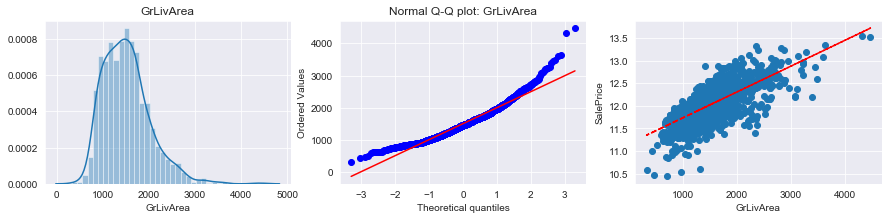

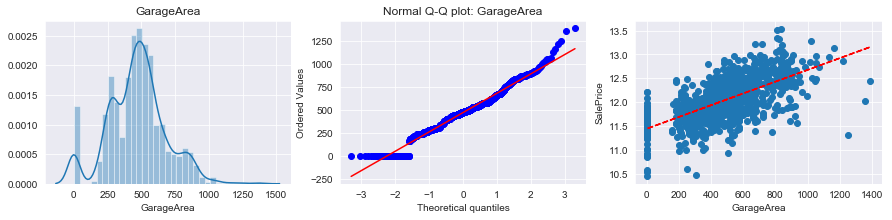

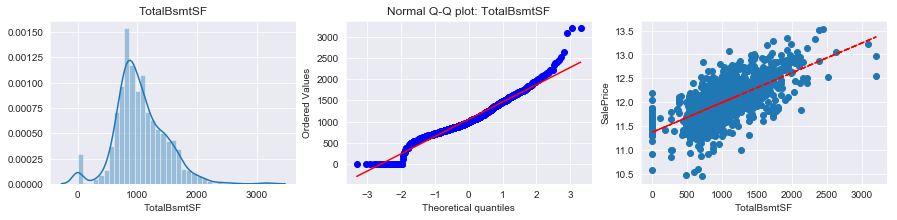

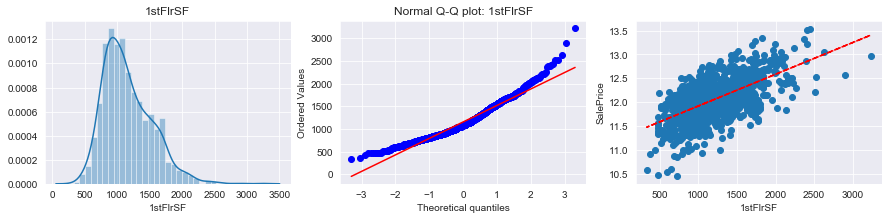

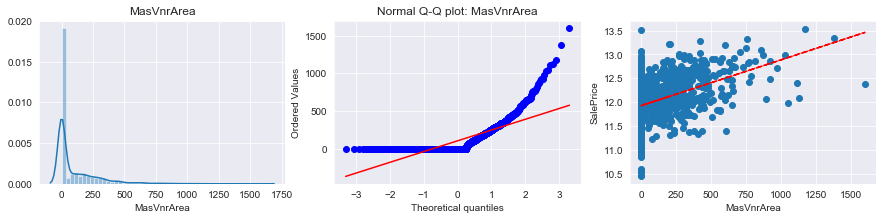

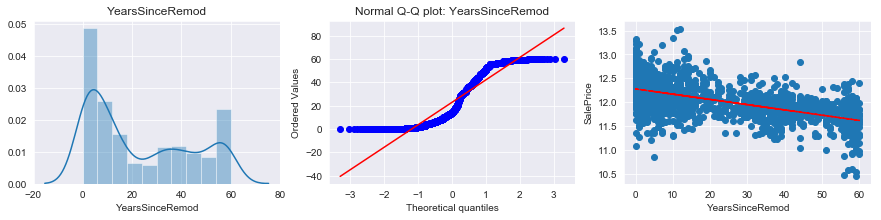

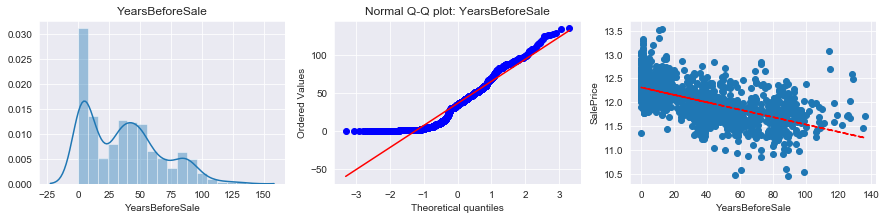

In [30]:
# create distribution, qq-plot, and scatter plot of continuous variables that are highly correlated with SalePrice
vars_to_plot = ['GrLivArea','GarageArea','TotalBsmtSF','1stFlrSF','MasVnrArea','YearsSinceRemod','YearsBeforeSale']
for var in vars_to_plot:
    plot_dist_scatter(var)

Some variables are rigth-skewed and possibly could benefit from log-transformation:
- GrLivArea
- 1stFlrSF
- TotalBsmtSF
    
YearsSinceRemod distribution looks like bimodal

**Try log transformation on variables mentioned above**

In [31]:
corr_df = train[vars_to_plot].copy()
corr_df['SalePrice'] = train['SalePrice']
col_order = ['SalePrice']
for v in vars_to_plot:
    var_name = 'log_' + v
    corr_df[var_name] = np.log1p(corr_df[v])
    col_order = col_order + [v, var_name]

corr_df = corr_df[col_order]
corr_df.corr()['SalePrice']

SalePrice              1.000000
GrLivArea              0.725211
log_GrLivArea          0.737431
GarageArea             0.656129
log_GarageArea         0.455088
TotalBsmtSF            0.647563
log_TotalBsmtSF        0.373312
1stFlrSF               0.620500
log_1stFlrSF           0.615408
MasVnrArea             0.430570
log_MasVnrArea         0.413996
YearsSinceRemod       -0.568529
log_YearsSinceRemod   -0.539200
YearsBeforeSale       -0.587767
log_YearsBeforeSale   -0.608368
Name: SalePrice, dtype: float64

**It looks like only GrLivArea and YearsBeforeSale benefited from transformation**

In [32]:
def log_transform_cols(df, col_names):
    for c in col_names:
        c_name = 'log_' + c
        df[c_name] = np.log1p(df[c])
        df.drop(c, axis=1, inplace=True)
    return df

# run
train = log_transform_cols(train, ['GrLivArea','YearsBeforeSale'])
test = log_transform_cols(test, ['GrLivArea','YearsBeforeSale'])

In [33]:
# Some columns are mostly zero indicating that this house-feature does not exist (e.g. No pool):
# - Mas Vnr Area (Masonry veneer area = None)
# - 2nd Fl SF (no second floor)
# - Low Qual Fin SF
# - Enclosed Porch
# - 3Ssn Porch
# - Screen Porch
# - Pool Area 
# - Misc Val

**Create scatterplots for the remaining count-variables that are highly correlated with SalePrice**

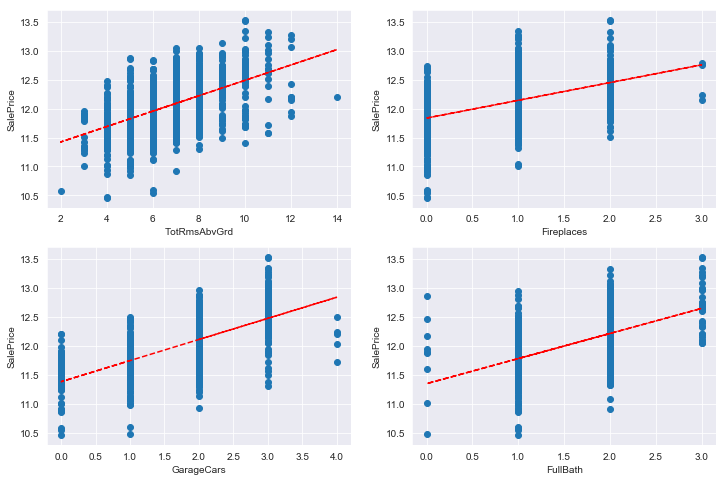

In [34]:
plt.figure(figsize=(12,8))
                 
for i, col in enumerate(['TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'FullBath']):
    plt.subplot(2, 2, i+1)
    plt.scatter(train[col], train['SalePrice'])
    z = np.polyfit(train[col], train['SalePrice'], 1)
    p = np.poly1d(z)
    plt.plot(train[col],p(train[col]),"r--")
    plt.xlabel(col)
    plt.ylabel('SalePrice')
plt.show()

- Could try sqrt-transformation on TotRmsAbvGrd

In [35]:
train['TotRmsAbvGrd'] = np.sqrt(train['TotRmsAbvGrd'])
test['TotRmsAbvGrd'] = np.sqrt(test['TotRmsAbvGrd'])

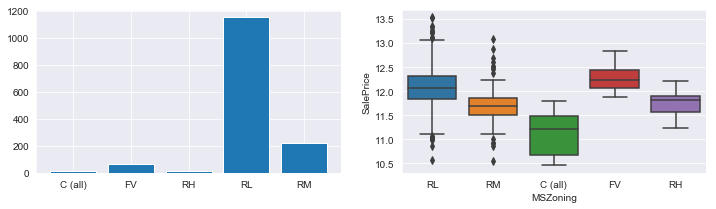

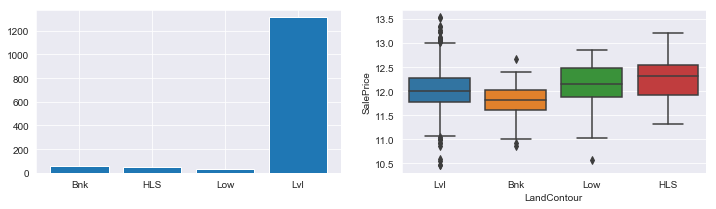

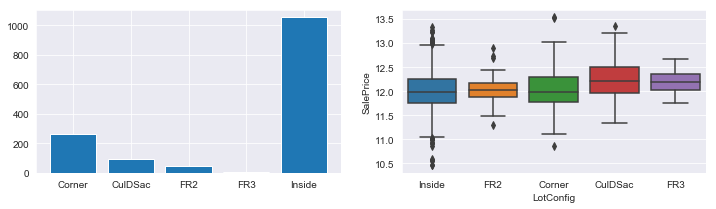

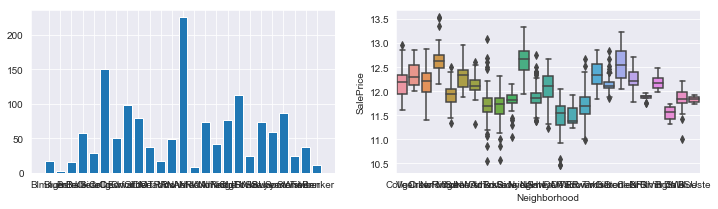

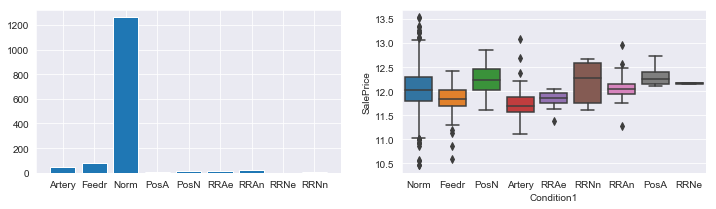

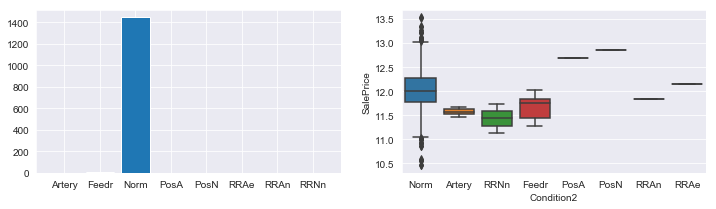

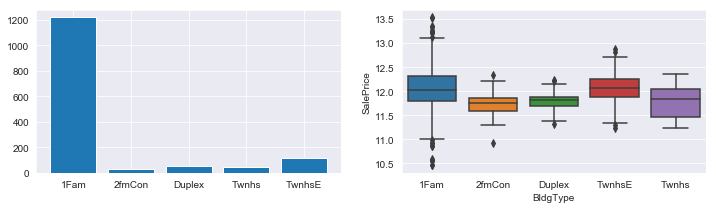

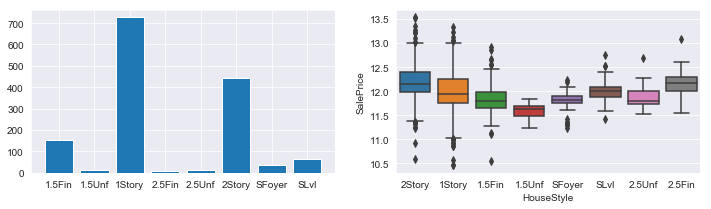

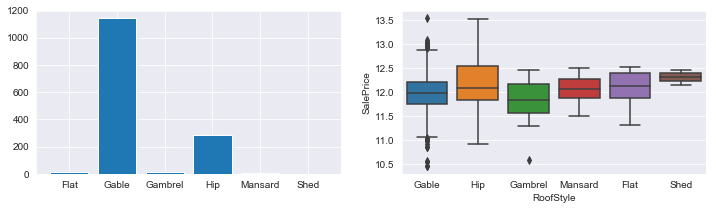

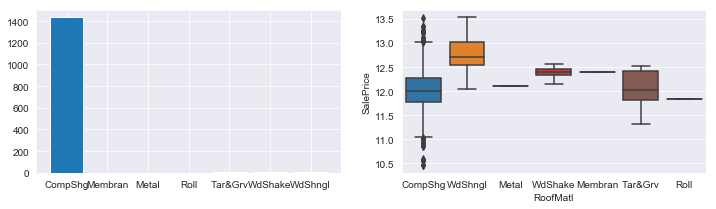

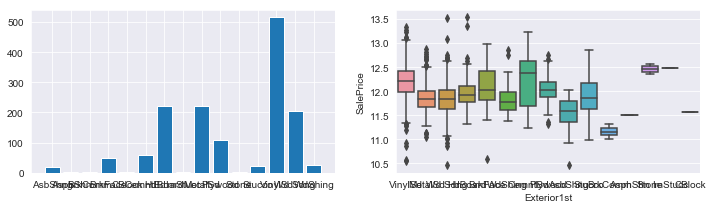

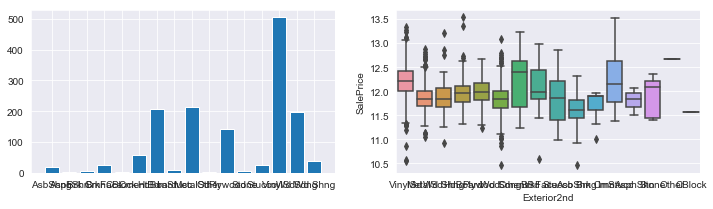

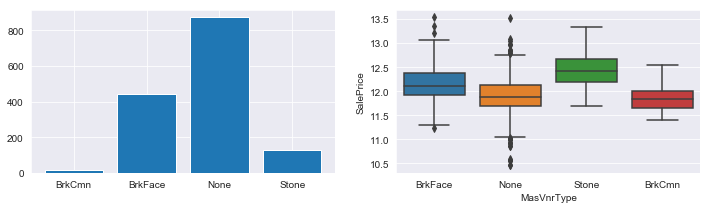

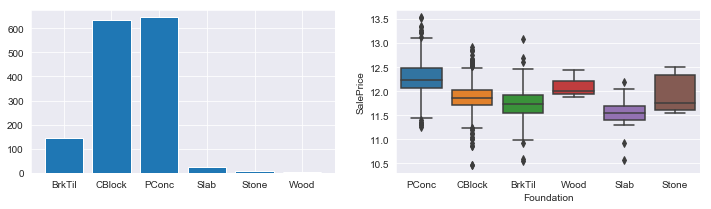

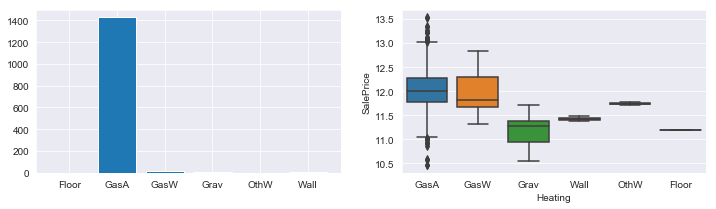

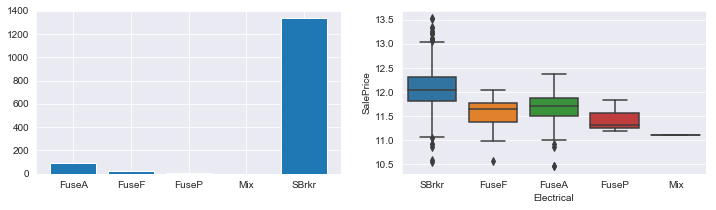

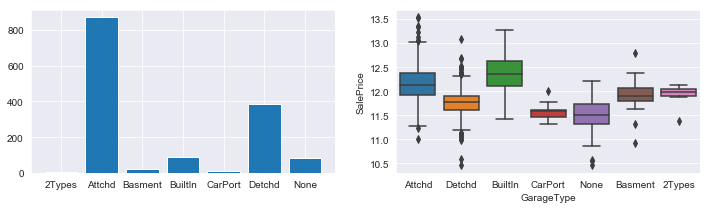

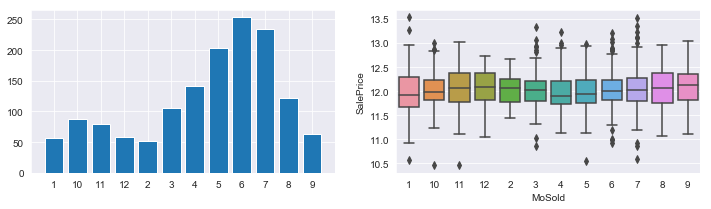

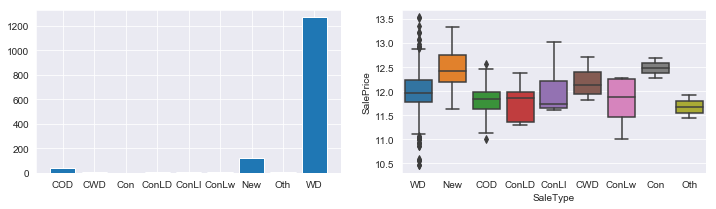

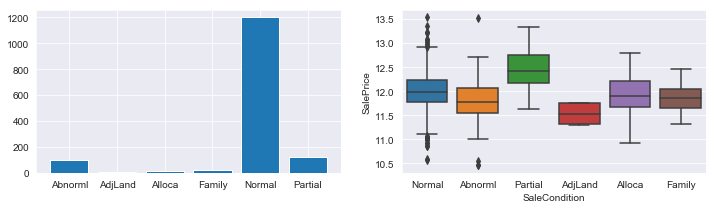

In [36]:
# now lets plot all categorical variables with Sale Price on the Y axis 
for col in cat_cols:
    fig = plt.figure(figsize=(12,3))
    ax1 = fig.add_subplot(1,2,1)
    freq_table = train[col].dropna().value_counts().sort_index()
    ax1.bar(freq_table.index, freq_table.values)
    ax2 = fig.add_subplot(1,2,2)
    ax2 = sns.boxplot(x=col, y="SalePrice", data=train)
    # sns.xticks(rotation=90)
    plt.show()

- MSZoning
    
Residential Areas have higher averafe SalePrice than C (all). Create a binary variable for Residential to replace MSZoning
    
- LandContour
    
Has very low variance. Similar information can be found in LandSlope
    
- LotConfig
    
The difference is avg SalePrice is low cross lot configurations
    
- Neighborhood
    
Has very high variance between the means. When dummyfied certain neighborhoods are likely to be good predictors of SalePrice
    
- Exterior1st and Exterior2nd should be combined when turned into binary 

- SaleType has very low variance. 'New' has higher AVG SalePrice than the rest (with the exception of 'Con'). Could create a binar variable (New_Sale)

Some nominal variables have *low variance*:
- LandContour. Similar information can be found in LandSlope
- Condition1
- 2Condition 2. When dummifying the columns we need to combine Condition 1 and 2 since (see data dictionary)
- BldgType
- RoofMatl
- Heating
- Electrical

## Create New Features

In [37]:
def get_new_featuers(df):
    df['MSZoning_Residential'] = df['MSZoning'].map({'RL':1, 'RM':1, 'C (all)':0, 'FV':1, 'RH':1})
    
    # create new features based on House Style
    num_floors = {
        '1Story':1,
        '1.5Fin':1.5,
        '1.5Unf':1.5,
        '2Story':2, 
        '2.5Fin':2.5,
        '2.5Unf':2.5,   
        'SFoyer':np.nan,
        'SLvl':np.nan
    }

    df['num_floors'] = df['HouseStyle'].map(num_floors)
    df['num_floors'] = np.where((df['num_floors'].isnull()) & (df['2ndFlrSF']>0), 2, df['num_floors'])
    df['num_floors'] = df['num_floors'].fillna(1)


    # create finished top floor var
    floor_fin = {
        '1Story':0,
        '1.5Fin':1,
        '1.5Unf':0,
        '2Story':0, 
        '2.5Fin':1,
        '2.5Unf':0,   
        'SFoyer':0,
        'SLvl':0
    }

    floor_fin_ms_subclass = {20:0, 30:0, 40:1, 45:0, 50:1, 60:0, 70:0, 75:0, 80:0, 
                             85:0, 90:0, 120:0, 150:0, 160:0, 180:0, 190:0}

    df['scnd_flr_fin_1'] = df['HouseStyle'].map(floor_fin)
    df['scnd_flr_fin_2'] = df['MSSubClass'].map(floor_fin_ms_subclass)
    df['scnd_flr_fin'] = np.where((df['scnd_flr_fin_1']==1)|(df['scnd_flr_fin_2']==1), 1, 0)
    df.drop(['scnd_flr_fin_1','scnd_flr_fin_2'],axis=1,inplace=True)

    # map Planned Unit Development
    pud_map = {20:0, 30:0, 40:0, 45:0, 50:0, 60:0, 70:0, 75:0, 80:0, 
               85:0, 90:0, 120:1, 150:1, 160:1, 180:1, 190:0}

    df['MSSubClass_pud'] = df['MSSubClass'].map(pud_map)
    df.drop(['MSZoning','HouseStyle','MSSubClass'], axis=1, inplace=True)
    
    return df

# apply to data
train = get_new_featuers(train)
test = get_new_featuers(test)

In [38]:
# drop variables with low variance
# consider using them in Ridge / Lasso 
low_var_cols = ['LandContour','Condition1','Condition2','RoofMatl','Heating','Electrical','SaleType']
for v in low_var_cols:
    print(v)
    print(round(train[v].value_counts(normalize=True),2))
    print('\n')

LandContour
Lvl    0.90
Bnk    0.04
HLS    0.03
Low    0.02
Name: LandContour, dtype: float64


Condition1
Norm      0.86
Feedr     0.05
Artery    0.03
RRAn      0.02
PosN      0.01
RRAe      0.01
PosA      0.01
RRNn      0.00
RRNe      0.00
Name: Condition1, dtype: float64


Condition2
Norm      0.99
Feedr     0.00
RRNn      0.00
Artery    0.00
RRAn      0.00
RRAe      0.00
PosN      0.00
PosA      0.00
Name: Condition2, dtype: float64


RoofMatl
CompShg    0.98
Tar&Grv    0.01
WdShngl    0.00
WdShake    0.00
Membran    0.00
Metal      0.00
Roll       0.00
Name: RoofMatl, dtype: float64


Heating
GasA     0.98
GasW     0.01
Grav     0.00
Wall     0.00
OthW     0.00
Floor    0.00
Name: Heating, dtype: float64


Electrical
SBrkr    0.91
FuseA    0.06
FuseF    0.02
FuseP    0.00
Mix      0.00
Name: Electrical, dtype: float64


SaleType
WD       0.87
New      0.08
COD      0.03
ConLD    0.01
ConLI    0.00
ConLw    0.00
CWD      0.00
Oth      0.00
Con      0.00
Name: SaleType, dtype: float

In [39]:
train.drop(low_var_cols, axis=1, inplace=True)
test.drop(low_var_cols, axis=1, inplace=True)

In [40]:
# create a fucntion that will fix column names in case new dummy columns contain spaces, slashes etc.
def fix_col(col_name):
    new_col = re.sub(r'[-/&().\s]+', "_", col_name)
    if new_col[0].isdigit():
        new_col = 'x' + new_col
    return new_col

In [41]:
# Combine the following features into one after getting dummy variables:
# Exterior 1st, 2nd
def create_binary(df, col_1, col_2, prefix=None):
    for col in list(df[col_1].unique()):
        col_name = prefix+col
        col_name = fix_col(col_name)
        df[col_name] = np.where((df[col_1]==col) | (df[col_2]==col), 1, 0)
    df.drop([col_1, col_2], axis=1, inplace=True)
    return df


# create labels for 'Exterior 1' and 'Exterior 2' columns
train = create_binary(train, 'Exterior1st', 'Exterior2nd', prefix='exterior_')
test = create_binary(test, 'Exterior1st', 'Exterior2nd', prefix='exterior_')

In [42]:
cat_cols_short = list(train.select_dtypes(include=['object']).columns)
train[cat_cols_short].head()

,LotConfig,Neighborhood,BldgType,RoofStyle,MasVnrType,Foundation,GarageType,MoSold,SaleCondition
0,Inside,CollgCr,1Fam,Gable,BrkFace,PConc,Attchd,2,Normal
1,FR2,Veenker,1Fam,Gable,None,CBlock,Attchd,5,Normal
2,Inside,CollgCr,1Fam,Gable,BrkFace,PConc,Attchd,9,Normal
3,Corner,Crawfor,1Fam,Gable,None,BrkTil,Detchd,2,Abnorml
4,FR2,NoRidge,1Fam,Gable,BrkFace,PConc,Attchd,12,Normal


In [43]:
for v in cat_cols_short:
    print(v)
    print(round(train[v].value_counts(normalize=True),2))
    print('\n')

LotConfig
Inside     0.72
Corner     0.18
CulDSac    0.06
FR2        0.03
FR3        0.00
Name: LotConfig, dtype: float64


Neighborhood
NAmes      0.15
CollgCr    0.10
OldTown    0.08
Edwards    0.07
Somerst    0.06
Gilbert    0.05
NridgHt    0.05
Sawyer     0.05
NWAmes     0.05
SawyerW    0.04
BrkSide    0.04
Crawfor    0.03
Mitchel    0.03
NoRidge    0.03
Timber     0.03
IDOTRR     0.03
ClearCr    0.02
SWISU      0.02
StoneBr    0.02
Blmngtn    0.01
MeadowV    0.01
BrDale     0.01
Veenker    0.01
NPkVill    0.01
Blueste    0.00
Name: Neighborhood, dtype: float64


BldgType
1Fam      0.84
TwnhsE    0.08
Duplex    0.04
Twnhs     0.03
2fmCon    0.02
Name: BldgType, dtype: float64


RoofStyle
Gable      0.78
Hip        0.19
Flat       0.01
Gambrel    0.01
Mansard    0.00
Shed       0.00
Name: RoofStyle, dtype: float64


MasVnrType
None       0.60
BrkFace    0.31
Stone      0.09
BrkCmn     0.01
Name: MasVnrType, dtype: float64


Foundation
PConc     0.44
CBlock    0.43
BrkTil    0.10
Sla

### Create dummy variables

In [44]:
# create a fucntion that will fix column names in case new dummy columns contain spaces, slashes etc.
def fix_col(col_name):
    new_col = re.sub(r'[-/&().\s]+', "_", col_name)
    if new_col[0].isdigit():
        new_col = 'x' + new_col
    return new_col

def create_dummies(df, col_names):
    df_dum = pd.get_dummies(df[col_names], prefix=col_names, prefix_sep='_', drop_first=True)
    # fix dummy col names 
    df_dum.columns = [fix_col(c) for c in df_dum.columns]
    # drop old categarical columns
    df.drop(col_names, axis=1, inplace=True)
    df = pd.concat([df, df_dum], sort=False, axis=1)
    return df


# apply to data
train = create_dummies(train, cat_cols_short)
test = create_dummies(test, cat_cols_short)

In [45]:
# in case if some variables that exist in train do not exist in test add them
train_cols = list(train.columns)
test_cols = list(test.columns)
missing_cols = []

for c in train_cols:
    if (c !='SalePrice') & (c not in test_cols):
        test[c] = 0

# Modeling

In [46]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge 
from sklearn import model_selection, pipeline, preprocessing, linear_model
from sklearn.metrics import mean_squared_error, make_scorer
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
sns.set_style("darkgrid")

In [47]:
# # train test split
# X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], 
#                                                     test_size = 0.3, random_state = 0)

In [48]:
X_train = train.drop('SalePrice', axis=1)
y_train = train['SalePrice']
X_test = test

**Test Linear regression with a set of features with high correlation with SalePrice (removed collinear) and binary features that looked like they could be good predictors based on the box-plots**

In [49]:
# get all neighborhood features
neighb = list(X_train.columns[X_train.columns.str.contains('Neighborhood_')])
# create a list of features to try first
features = ['log_GrLivArea','GarageCars','TotalBsmtSF','FullBath',
            'Fireplaces','MasVnrArea','log_YearsBeforeSale','MSZoning_Residential']+neighb

In [50]:
# create a function that prepares a string for statsmodels linear regression
def get_feature_str(cols_list):
    col_string = 'SalePrice ~'

    for i, f in enumerate(cols_list):
        if i < (len(cols_list)-1):
            col_string = col_string + " " + f + " +"
        else:
            col_string = col_string + " " + f
    return col_string

In [51]:
# put the df back together for patsy
data = pd.concat([X_train, y_train], axis=1)

def run_statsmodels(data, features_list):
# statsmodels cannot take variables that start with a digit, let's rename them
    data.rename(columns={'3SsnPorch':'x3SsnPorch','1stFlrSF':'x1stFlrSF','2ndFlrSF':'x2ndFlrSF'}, inplace=True)
    features = get_feature_str(features_list)

    i = 1
    while i > 0:
        # define the model
        lm_ols = smf.ols(features, data=data)
        # fit the model
        fit = lm_ols.fit()
        # check p-vals
        p_vals = fit.pvalues
        new_features = list(p_vals[p_vals<0.05].index)
        i = len(p_vals.index)-len(new_features)
        if 'Intercept' in new_features:
            new_features.remove('Intercept')
        features = get_feature_str(new_features)


    lm_ols = smf.ols(features, data=data)
    # fit the model
    fit = lm_ols.fit()
    return fit.summary(), new_features
    
# test the first set of features
sm_summary, new_features = run_statsmodels(data, features)
print(sm_summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     438.3
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:08:29   Log-Likelihood:                 631.24
No. Observations:                1458   AIC:                            -1224.
Df Residuals:                    1439   BIC:                            -1124.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                8.0372 

In [52]:
len(new_features)

18

**Observation:**
With a set of 18 features we were able to achieve adj R^2 of 84.4%. 

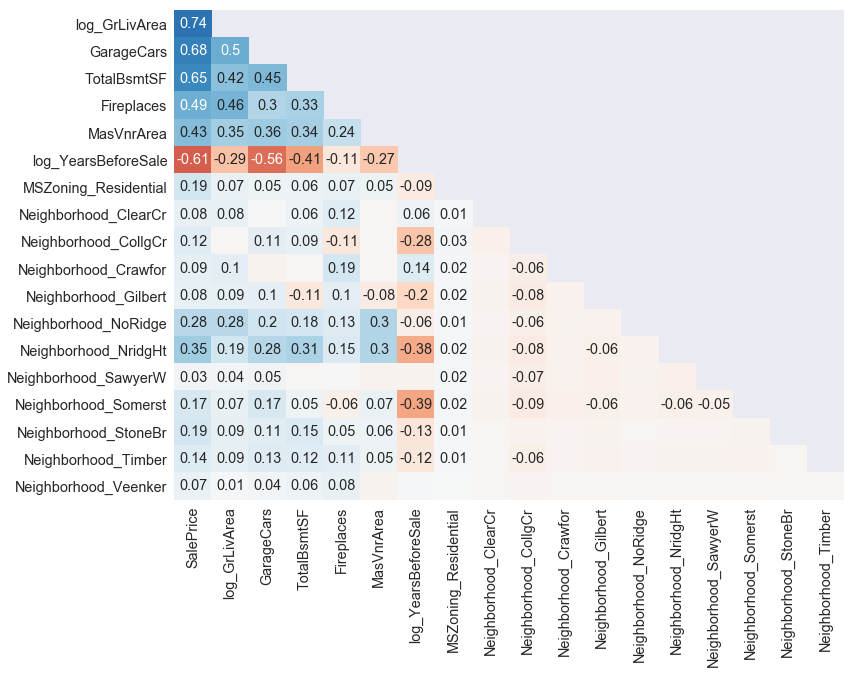

In [53]:
corr_features = ['SalePrice']+new_features
plot_corr(data[corr_features], width=12, height=9)

**Lets now try to run all the existing features in statsmodels and identify the ones with p-val <0.05**

In [54]:
sm_summary, new_features = run_statsmodels(data, list(data.columns[:-1]))
print(sm_summary)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     438.5
Date:                Fri, 06 Sep 2019   Prob (F-statistic):               0.00
Time:                        16:08:30   Log-Likelihood:                 1193.3
No. Observations:                1458   AIC:                            -2301.
Df Residuals:                    1415   BIC:                            -2073.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 8.79

In [55]:
print('Statsmodels identified {} features in the model with p-val <0.5'.format(len(new_features)))

Statsmodels identified 42 features in the model with p-val <0.5


In [56]:
for f in ['x3SsnPorch','x1stFlrSF','x2ndFlrSF']:
    if f in new_features:
        new_features.remove(f)
        new_features.append(f[1:])

# Try sklean LinearRegression

Check what R^2 is using all the features that came out of stats models with p-val <0.05

In [57]:
lr = LinearRegression()
lr.fit(X_train[new_features], y_train)
scores = -cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
scores.mean()

0.013301730119333683

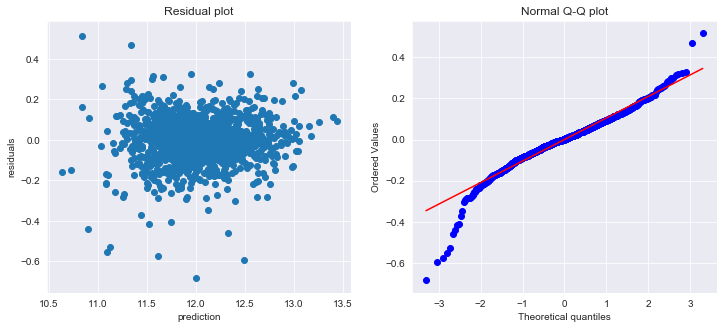

In [58]:
def diagnostic_plot(y_act, y_pred):
    plt.figure(figsize=(12,5))
    
    plt.subplot(1, 2, 1)
    res = y_act - y_pred
    plt.scatter(y_pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 2, 2)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")
    
diagnostic_plot(y_train, lr.predict(X_train[new_features]))

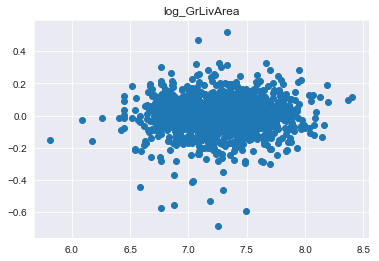

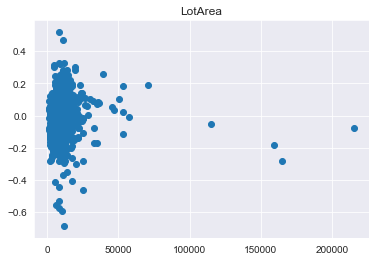

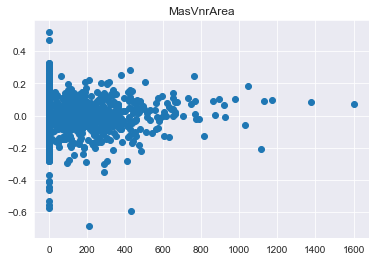

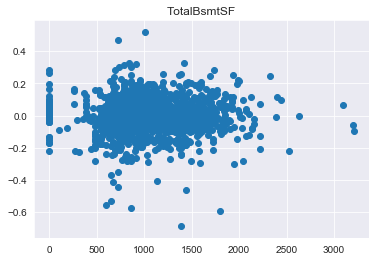

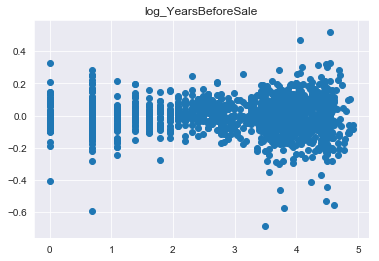

In [59]:
# plot residuals against different values of X
res = y_train - lr.predict(X_train[new_features])
cont_cols = ['log_GrLivArea', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'log_YearsBeforeSale']
for x in cont_cols:
    plt.scatter(X_train[x], res)
    plt.title(x)
    plt.show()

# Ridge

In [60]:
# transform our features
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [61]:
# plt.figure(figsize=(8, 5))
# train_scores = []
# test_scores = []
# alpha = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

# idx = []
# for i, a in enumerate(alpha):
#     rr = Ridge(alpha=a)
#     rr.fit(X_train_sc, y_train)
#     train_scores.append(rr.score(X_train_sc, y_train))
#     test_scores.append(rr.score(X_test_sc, y_test))
#     idx.append(i)

# plt.plot(idx, train_scores, label="train")
# plt.plot(idx, test_scores, label="test")
# plt.xlabel("alpha")
# plt.ylabel("R^2")

# plt.legend()

In [62]:
parameters = {'alpha':np.linspace(0.001,200,1000)}
rr = Ridge()
model = GridSearchCV(rr, parameters, cv=5)
model.fit(X_train_sc, y_train)
model.best_params_

{'alpha': 116.11653553553555}

In [63]:
model.best_params_['alpha']

116.11653553553555

In [64]:
# fir Ridge with the best alpha param
rr = Ridge(alpha=model.best_params_['alpha'])
rr.fit(X_train_sc, y_train)
scores = -cross_val_score(rr, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=10)
scores.mean()

0.01292683910387361

In [65]:
np.sqrt(scores.mean())

0.1136962580909047

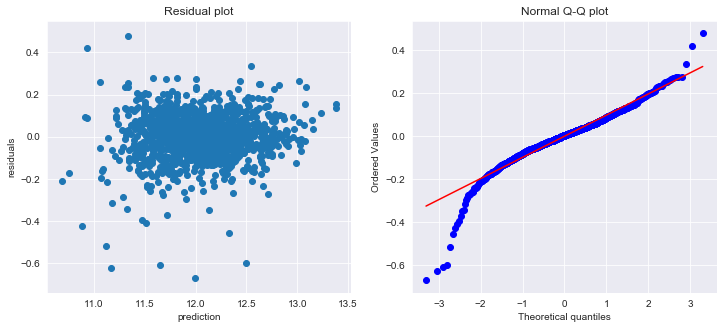

In [66]:
diagnostic_plot(y_train, rr.predict(X_train_sc))

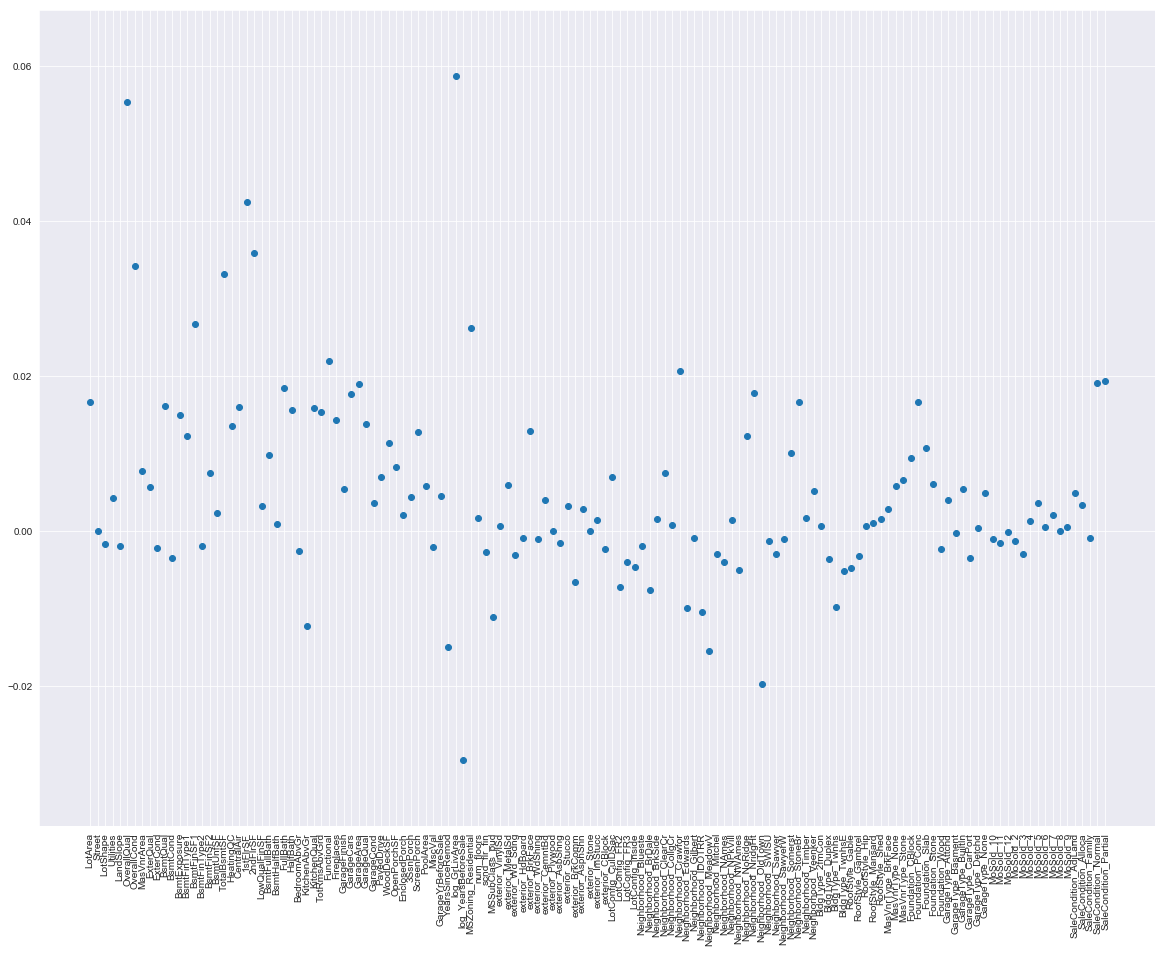

In [67]:
plt.figure(figsize=(20,15))
plt.scatter(X_train.columns, rr.coef_)
plt.xticks(rotation=90);

# Lasso

In [68]:
parameters = {'alpha':np.linspace(0.00001,1,1000)}
ls = Lasso(max_iter=1000000)
model = GridSearchCV(ls, parameters, cv=5)
model.fit(X_train_sc, y_train)
model.best_params_

{'alpha': 0.0030129729729729735}

In [69]:
model.best_params_['alpha']

0.0030129729729729735

In [70]:
# fir Ridge with the best alpha param
ls = Lasso(alpha=model.best_params_['alpha'])
ls.fit(X_train_sc, y_train)
scores = -cross_val_score(ls, X_train_sc, y_train, scoring='neg_mean_squared_error', cv=10)
scores.mean()

0.01250274343482934

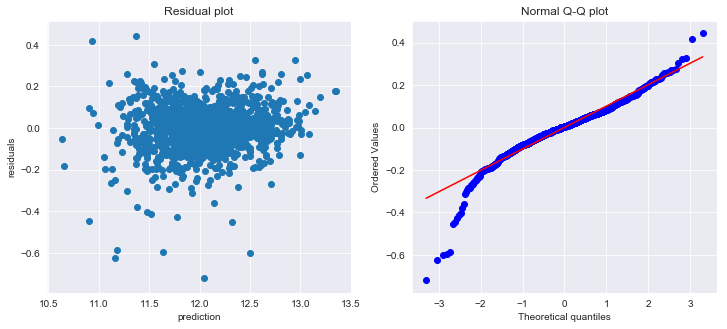

In [71]:
diagnostic_plot(y_train, ls.predict(X_train_sc))

Number of features that Lasso model identified: 75


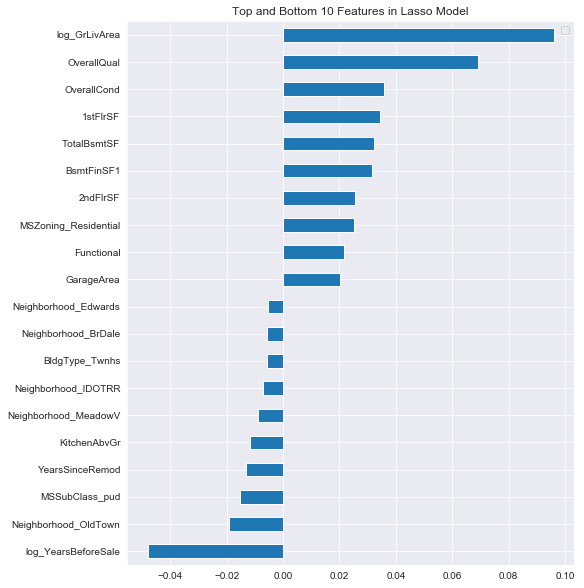

In [72]:
coef = pd.Series(ls.coef_, index = X_train.columns)
print('Number of features that Lasso model identified: {}'.format(len(coef[coef!=0])))
non_zero_feat = coef[coef!=0].sort_values()

imp_coef = pd.concat([non_zero_feat.head(10), non_zero_feat.tail(10)])

plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Top and Bottom 10 Features in Lasso Model")
plt.legend('')
plt.show()

In [80]:
submission = pd.DataFrame({'Id':np.arange(1461, 2920), 'SalePrice':np.exp(ls.predict(X_test_sc))})
print(submission.head())
submission.to_csv('elena_b_submission_1.csv', index=False)

     Id      SalePrice
0  1461  106566.938475
1  1462  148559.632675
2  1463  186570.650477
3  1464  205898.933927
4  1465  166802.565910


Next steps:
- focus only on continuous and discrete variables (28 total)
- create sctter plots for all of them. Come up with initial hypothesis and what transformation could work (box-cox, plynomial and log)
- run throught statmodels first. Find out the strongest ones
- check error distribution for the entire model. Check error distribution for each variables
- come up with trasnformations
- run the model on transformed
- see if removing outliers help
- check the realtionship between: Overall Qual, Gr Liv Area
- create three list of variables: numerical (cont and descrete), ranking (ordinal: Quality), categorical
- plot standardized residuals (to test for outliers)
- calculate leverage statistic for observations (see if ther ones with hight leverage that needs to be removed)
- deal with colinearity 
